# Analyse des meilleurs vendeurs

## Qui sont les vendeurs les plus performants et quels facteurs influencent leur succès ?

In [1]:
import pandas as pd, os, matplotlib.pyplot as plt, seaborn as sns

os.chdir(r"../donnees")

In [2]:
# Chargement des données
analyse_achats = pd.read_parquet("analyse_achat.parquet")

analyse_achats['purchase_timestamp'] = pd.to_datetime(analyse_achats['purchase_timestamp'])

analyse_achats = analyse_achats[
    (analyse_achats["purchase_timestamp"] >= "2017-01-01") & 
    (analyse_achats["purchase_timestamp"] <= "2018-08-31")
]

unique_sellers = analyse_achats['seller_id'].unique()
seller_names = {seller_id: f'Seller {i+1}' for i, seller_id in enumerate(unique_sellers)}
analyse_achats['seller_name'] = analyse_achats['seller_id'].map(seller_names)
seller_performance = analyse_achats.groupby('seller_name').agg({
    'order_item_id': 'count',
    'price': 'sum',
    'freight_value': 'sum',
    'weight_g': 'sum',
    'purchase_timestamp': 'nunique'
}).reset_index().rename(columns={
    'order_item_id': 'total_sales',
    'price': 'total_revenue',
    'freight_value': 'total_freight_value',
    'weight_g': 'total_weight',
    'purchase_timestamp': 'unique_dates'
})
top_sellers = seller_performance.nlargest(10, 'total_revenue')
top_seller_names = top_sellers['seller_name'].tolist()
top_seller_data = analyse_achats[analyse_achats['seller_name'].isin(top_seller_names)]
category_sales = top_seller_data.groupby('category_name')['order_item_id'].count().reset_index(name='count').sort_values(by='count', ascending=False).head(10)

analyse_achats.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id', 'price',
       'freight_value', 'shipping_limit', 'limit', 'name_lenght',
       'description_lenght', 'photos_qty', 'weight_g', 'length_cm',
       'height_cm', 'width_cm', 'category_name', 'customer_id',
       'purchase_timestamp', 'approved_at', 'delivered_carrier',
       'delivered_customer', 'estimated_delivery', 'status', 'annee', 'mois',
       'annee_mois', 'jour', 'annee_jour', 'jour_semaine', 'trimestre',
       'annee_trimestre', 'semaine', 'annee_semaine', 'heure', 'approuvee',
       'envoyee', 'livree', 'estimee', 'customer_unique_id', 'cust_zip_code',
       'cust_city', 'cust_state', 'cust_name_state', 'cust_lat', 'cust_lng',
       'sell_zip_code', 'sell_city', 'sell_state', 'sell_name_state',
       'sell_lat', 'sell_lng', 'seller_name'],
      dtype='object')

### Chiffre d'affaires des vendeurs les plus performants

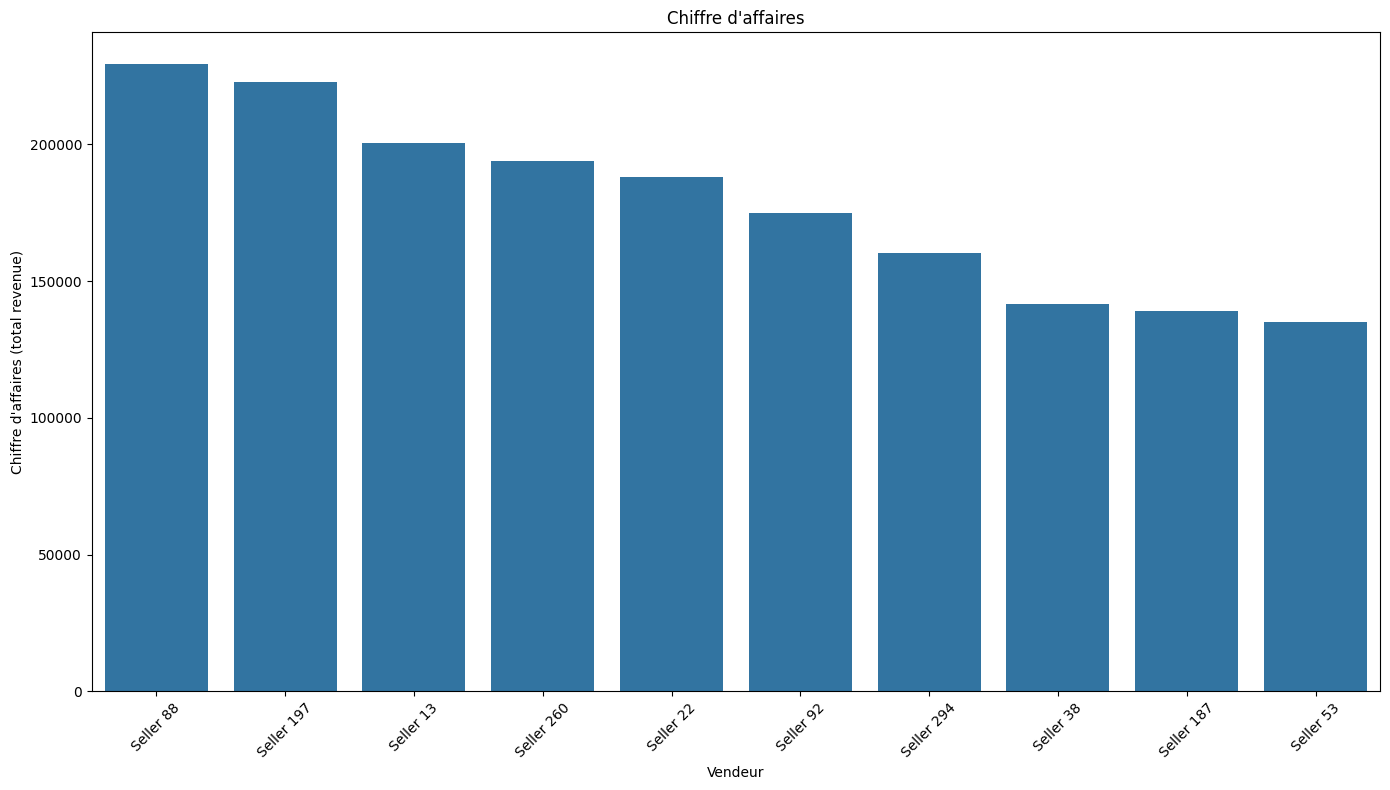

In [3]:
plt.figure(figsize=(14, 8))
sns.barplot(x='seller_name', y='total_revenue', data=top_sellers)
plt.xlabel('Vendeur')
plt.ylabel('Chiffre d\'affaires (total revenue)')
plt.title('Chiffre d\'affaires')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Nombre total de ventes

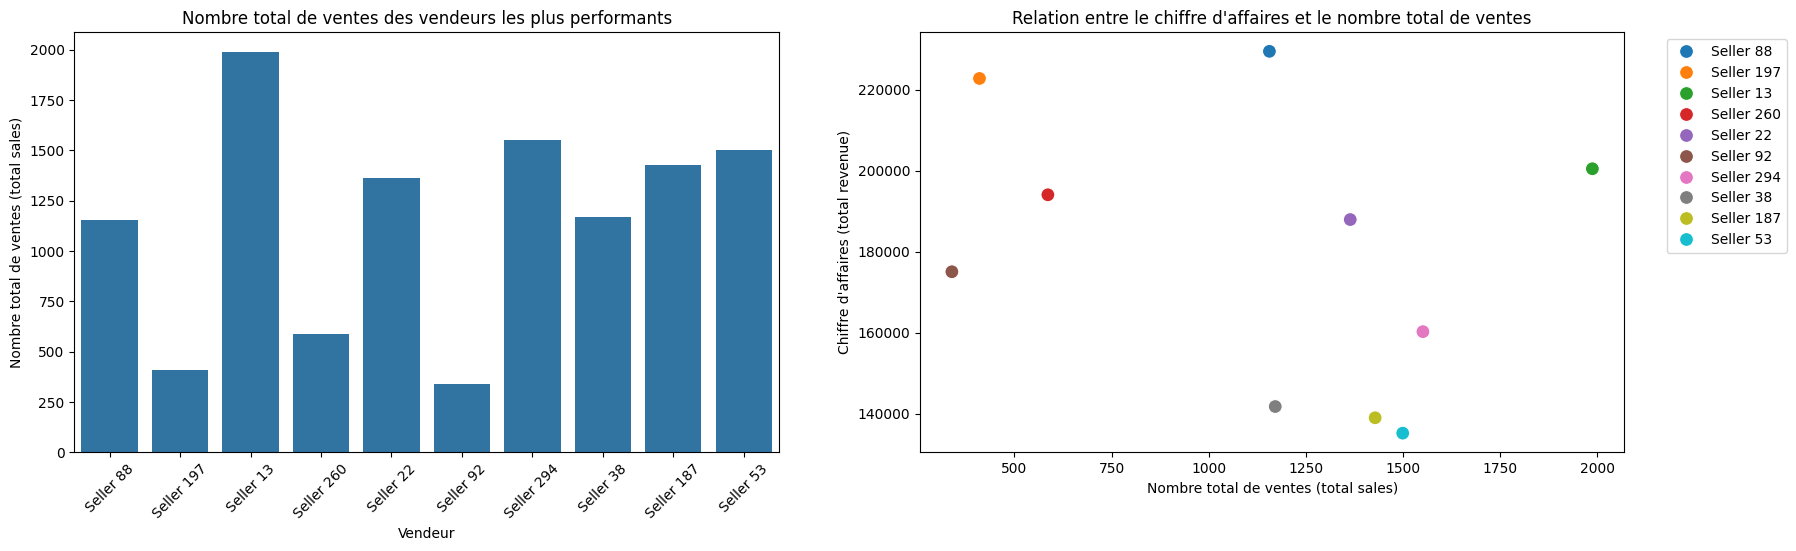

In [4]:
plt.figure(figsize=(20, 12))

plt.subplot(2, 2, 1)
sns.barplot(x='seller_name', y='total_sales', data=top_sellers)
plt.xlabel('Vendeur')
plt.ylabel('Nombre total de ventes (total sales)')
plt.title('Nombre total de ventes des vendeurs les plus performants')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
sns.scatterplot(x='total_sales', y='total_revenue', data=top_sellers, hue='seller_name', s=100)
plt.xlabel('Nombre total de ventes (total sales)')
plt.ylabel('Chiffre d\'affaires (total revenue)')
plt.title('Relation entre le chiffre d\'affaires et le nombre total de ventes')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

### Frais de transport

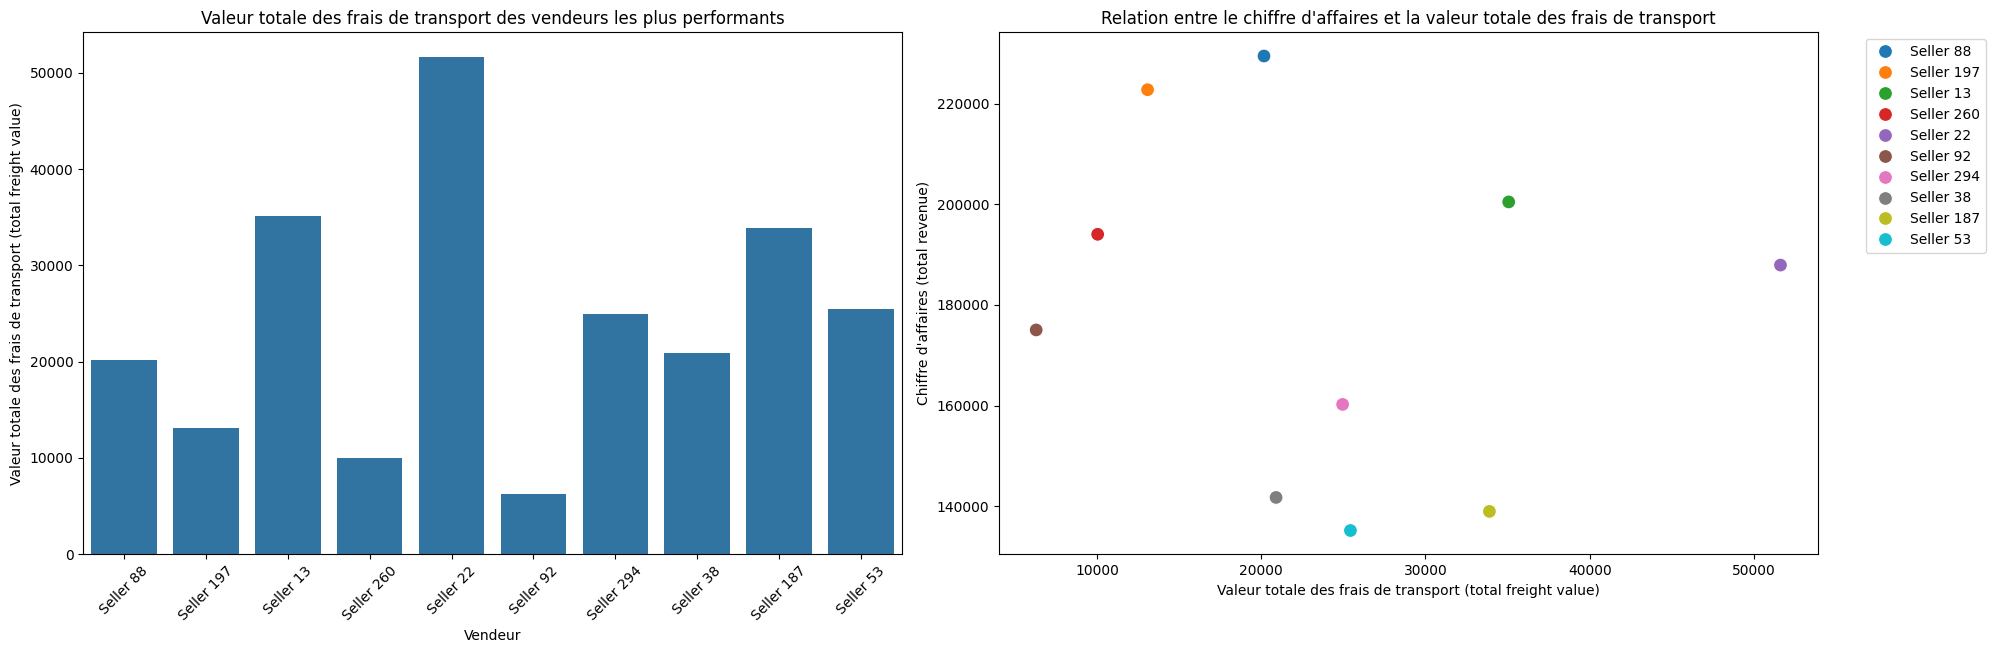

In [5]:
plt.figure(figsize=(20, 12))

plt.subplot(2, 2, 3)
sns.barplot(x='seller_name', y='total_freight_value', data=top_sellers)
plt.xlabel('Vendeur')
plt.ylabel('Valeur totale des frais de transport (total freight value)')
plt.title('Valeur totale des frais de transport des vendeurs les plus performants')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
sns.scatterplot(x='total_freight_value', y='total_revenue', data=top_sellers, hue='seller_name', s=100)
plt.xlabel('Valeur totale des frais de transport (total freight value)')
plt.ylabel('Chiffre d\'affaires (total revenue)')
plt.title('Relation entre le chiffre d\'affaires et la valeur totale des frais de transport')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

## Poids total

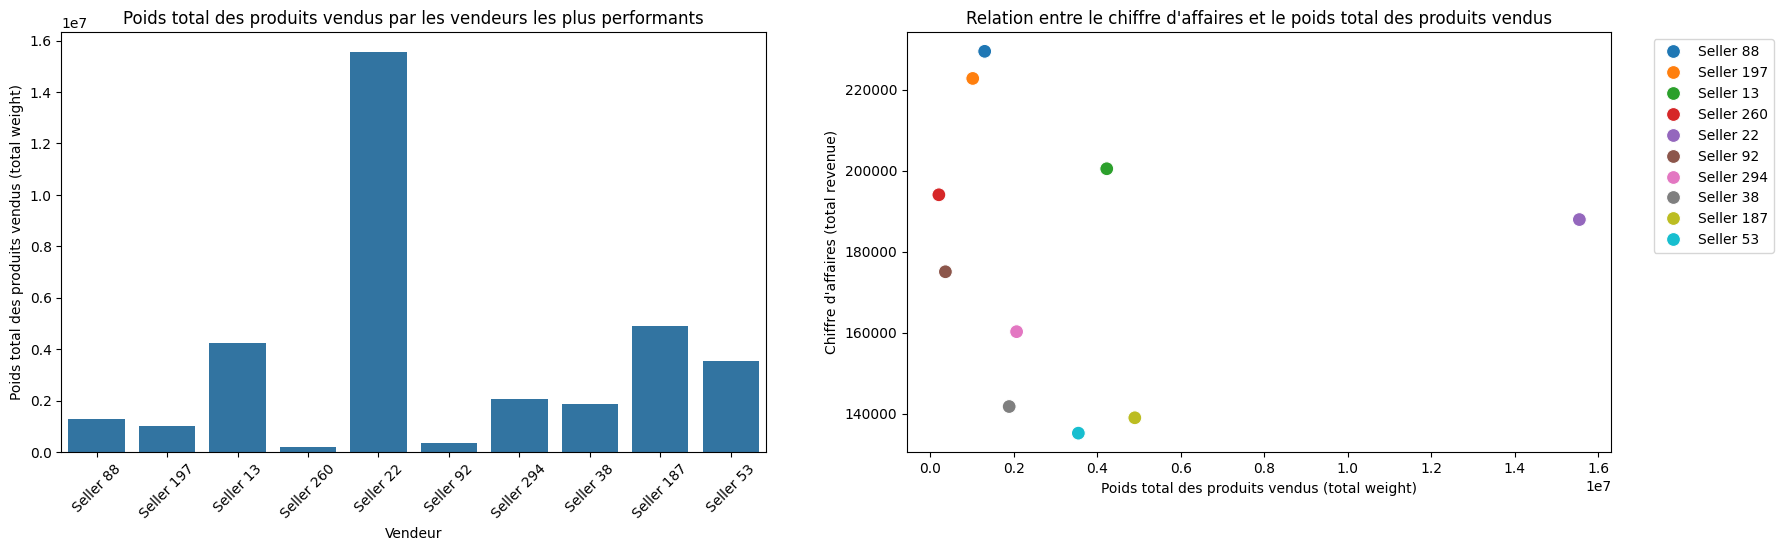

In [6]:
plt.figure(figsize=(20, 12))

plt.subplot(2, 2, 1)
sns.barplot(x='seller_name', y='total_weight', data=top_sellers)
plt.xlabel('Vendeur')
plt.ylabel('Poids total des produits vendus (total weight)')
plt.title('Poids total des produits vendus par les vendeurs les plus performants')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
sns.scatterplot(x='total_weight', y='total_revenue', data=top_sellers, hue='seller_name', s=100)
plt.xlabel('Poids total des produits vendus (total weight)')
plt.ylabel('Chiffre d\'affaires (total revenue)')
plt.title('Relation entre le chiffre d\'affaires et le poids total des produits vendus')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

### Nombre de jours uniques de ventes

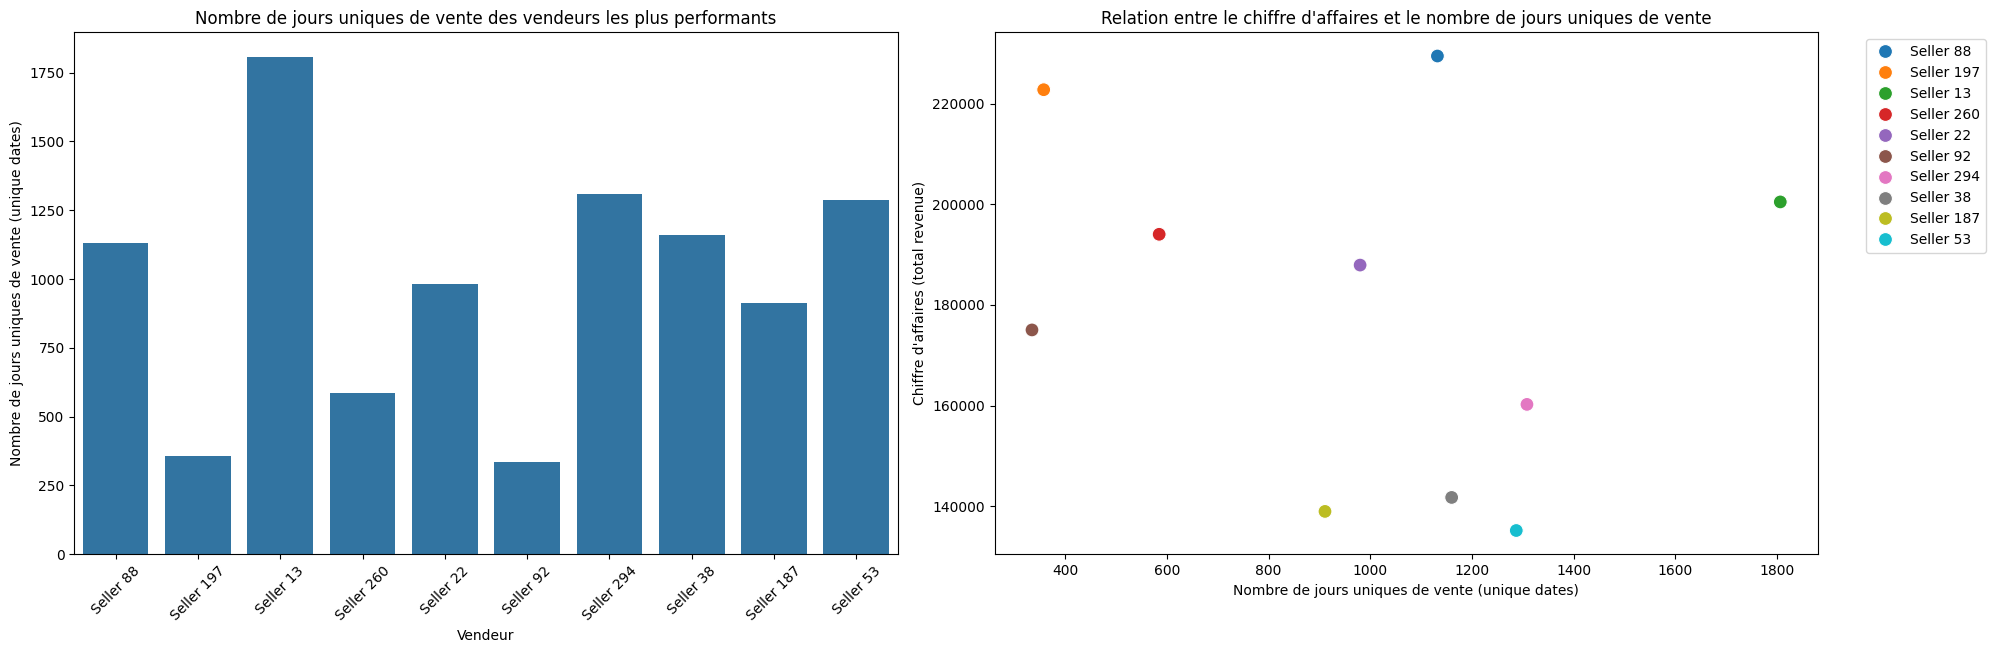

In [7]:
plt.figure(figsize=(20, 12))
plt.subplot(2, 2, 3)
sns.barplot(x='seller_name', y='unique_dates', data=top_sellers)
plt.xlabel('Vendeur')
plt.ylabel('Nombre de jours uniques de vente (unique dates)')
plt.title('Nombre de jours uniques de vente des vendeurs les plus performants')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
sns.scatterplot(x='unique_dates', y='total_revenue', data=top_sellers, hue='seller_name', s=100)
plt.xlabel('Nombre de jours uniques de vente (unique dates)')
plt.ylabel('Chiffre d\'affaires (total revenue)')
plt.title('Relation entre le chiffre d\'affaires et le nombre de jours uniques de vente')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### Chiffre d'affaires moyen par jour des meilleurs vendeurs

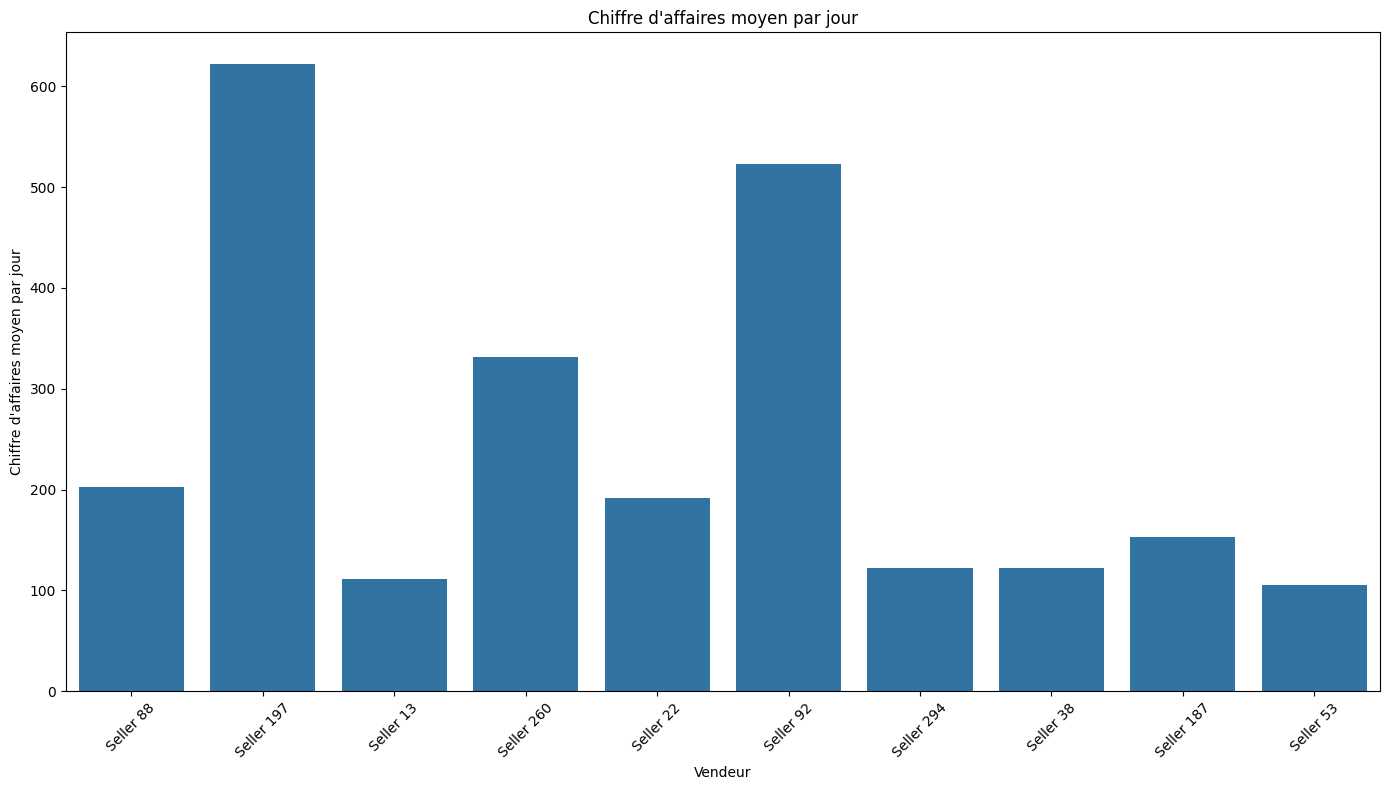

In [8]:
top_sellers['avg_revenue_per_day'] = top_sellers['total_revenue'] / top_sellers['unique_dates']
plt.figure(figsize=(14, 8))
sns.barplot(x='seller_name', y='avg_revenue_per_day', data=top_sellers)
plt.xlabel('Vendeur')
plt.ylabel('Chiffre d\'affaires moyen par jour')
plt.title('Chiffre d\'affaires moyen par jour')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Catégories de produits les plus vendues par les meilleurs vendeurs

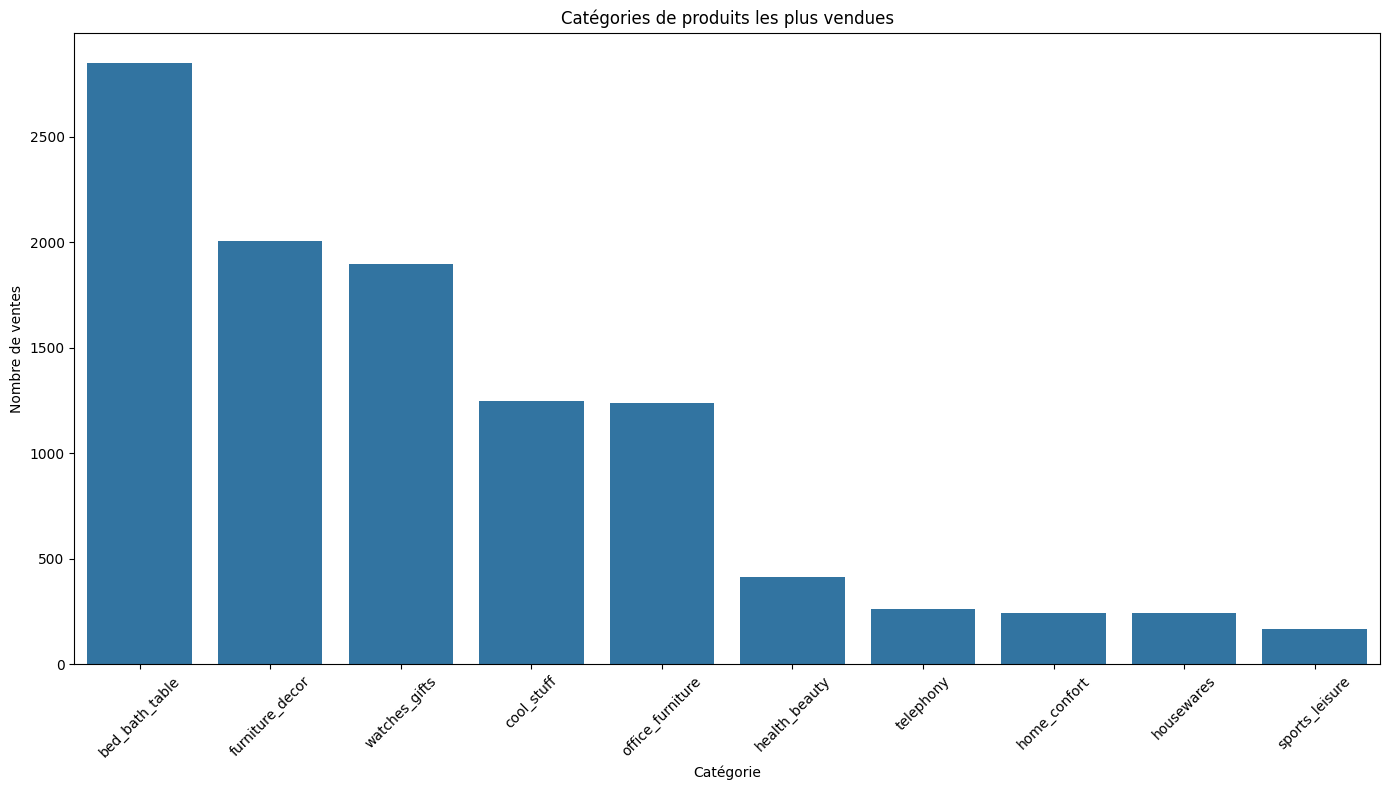

In [9]:
plt.figure(figsize=(14, 8))
sns.barplot(x='category_name', y='count', data=category_sales)
plt.xlabel('Catégorie')
plt.ylabel('Nombre de ventes')
plt.title('Catégories de produits les plus vendues')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Relation entre le prix moyen des produits et le succès des vendeurs

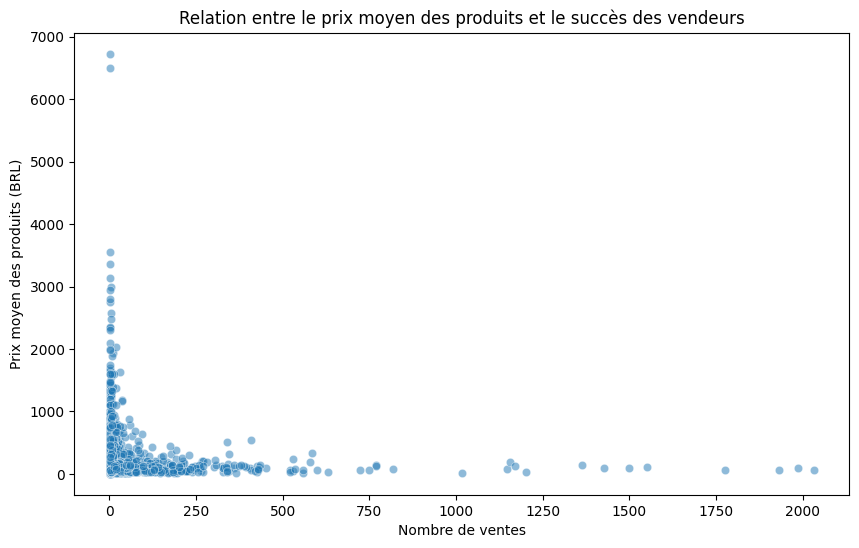

In [10]:
avg_price_per_seller = analyse_achats.groupby("seller_id")["price"].mean()
sales_per_seller = analyse_achats["seller_id"].value_counts()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=sales_per_seller, y=avg_price_per_seller, alpha=0.5)

plt.xlabel("Nombre de ventes")
plt.ylabel("Prix moyen des produits (BRL)")
plt.title("Relation entre le prix moyen des produits et le succès des vendeurs")

plt.show()

### Impact des frais de livraison sur le succès des vendeurs

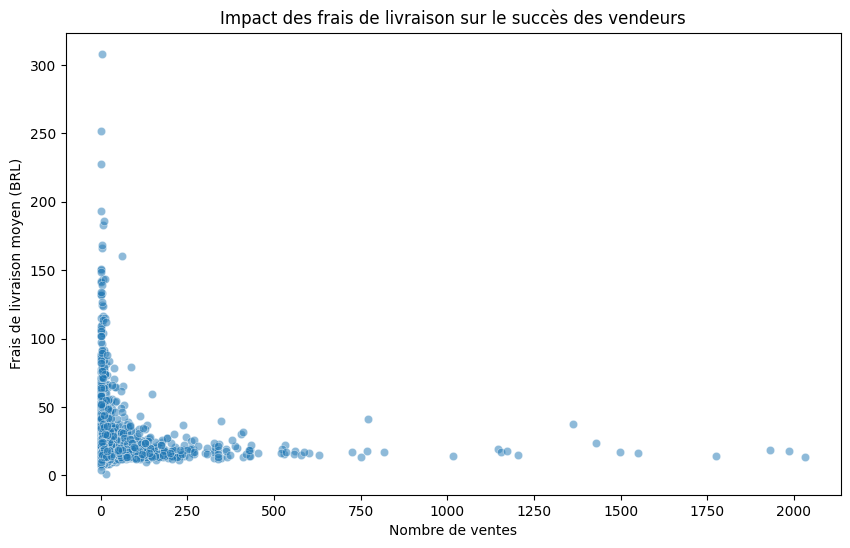

In [11]:
avg_freight_per_seller = analyse_achats.groupby("seller_id")["freight_value"].mean()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=sales_per_seller, y=avg_freight_per_seller, alpha=0.5)

plt.xlabel("Nombre de ventes")
plt.ylabel("Frais de livraison moyen (BRL)")
plt.title("Impact des frais de livraison sur le succès des vendeurs")

plt.show()